In [8]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
plt.style.use(['science', 'ieee', 'grid'])

In [9]:
Nwalker=300;MCSteps=5000
x=[0]*Nwalker
nAccept=0;eSum=0
alphas = np.linspace(0, 2, 10)  
average_energies = []

def initialize():

    for i in range(Nwalker):
        x[i]=2*random()-1

def p(xTrial,x):

    # ratio of rho(xTrial) / rho(x)
    return (lambda**2 - xTrial**2)/(lambda**2 - x**2)

def eLocal(x):

    # local energy
    return x**7/7 - lambda**2*x**5/5 + lambda**3 * x**3/3 + lambda**2 * x - x**3/3

def MetropolisStep():

    global eSum,nAccept
    n=int(random()*Nwalker)
    delta=0.05*(2*random()-1)
    xTrial=x[n]+delta

    # Metropolis test
    w=p(xTrial,x[n])

    if w>=random():
        x[n]=xTrial
        nAccept+=1

    # accumulate energy
    e=eLocal(x[n])
    eSum+=e

def oneMonteCarloStep():
   # perform 'Nwalker' Metropolis steps
   for i in range(Nwalker):
       MetropolisStep()

#...............................................
#.....................END.......................

In [10]:
# Loop over different values of Lambda
for Lambda in alphas:
    initialize()

    # perform 20% of MCSteps as thermalization steps
    thermSteps = int(0.2 * MCSteps)
    for _ in range(thermSteps):
        oneMonteCarloStep()

    # production steps
    nAccept = 0
    eSum = 0
    for _ in range(MCSteps):
        oneMonteCarloStep()

    # compute and store the average energy
    eAve = eSum / (Nwalker * MCSteps)
    average_energies.append(eAve)

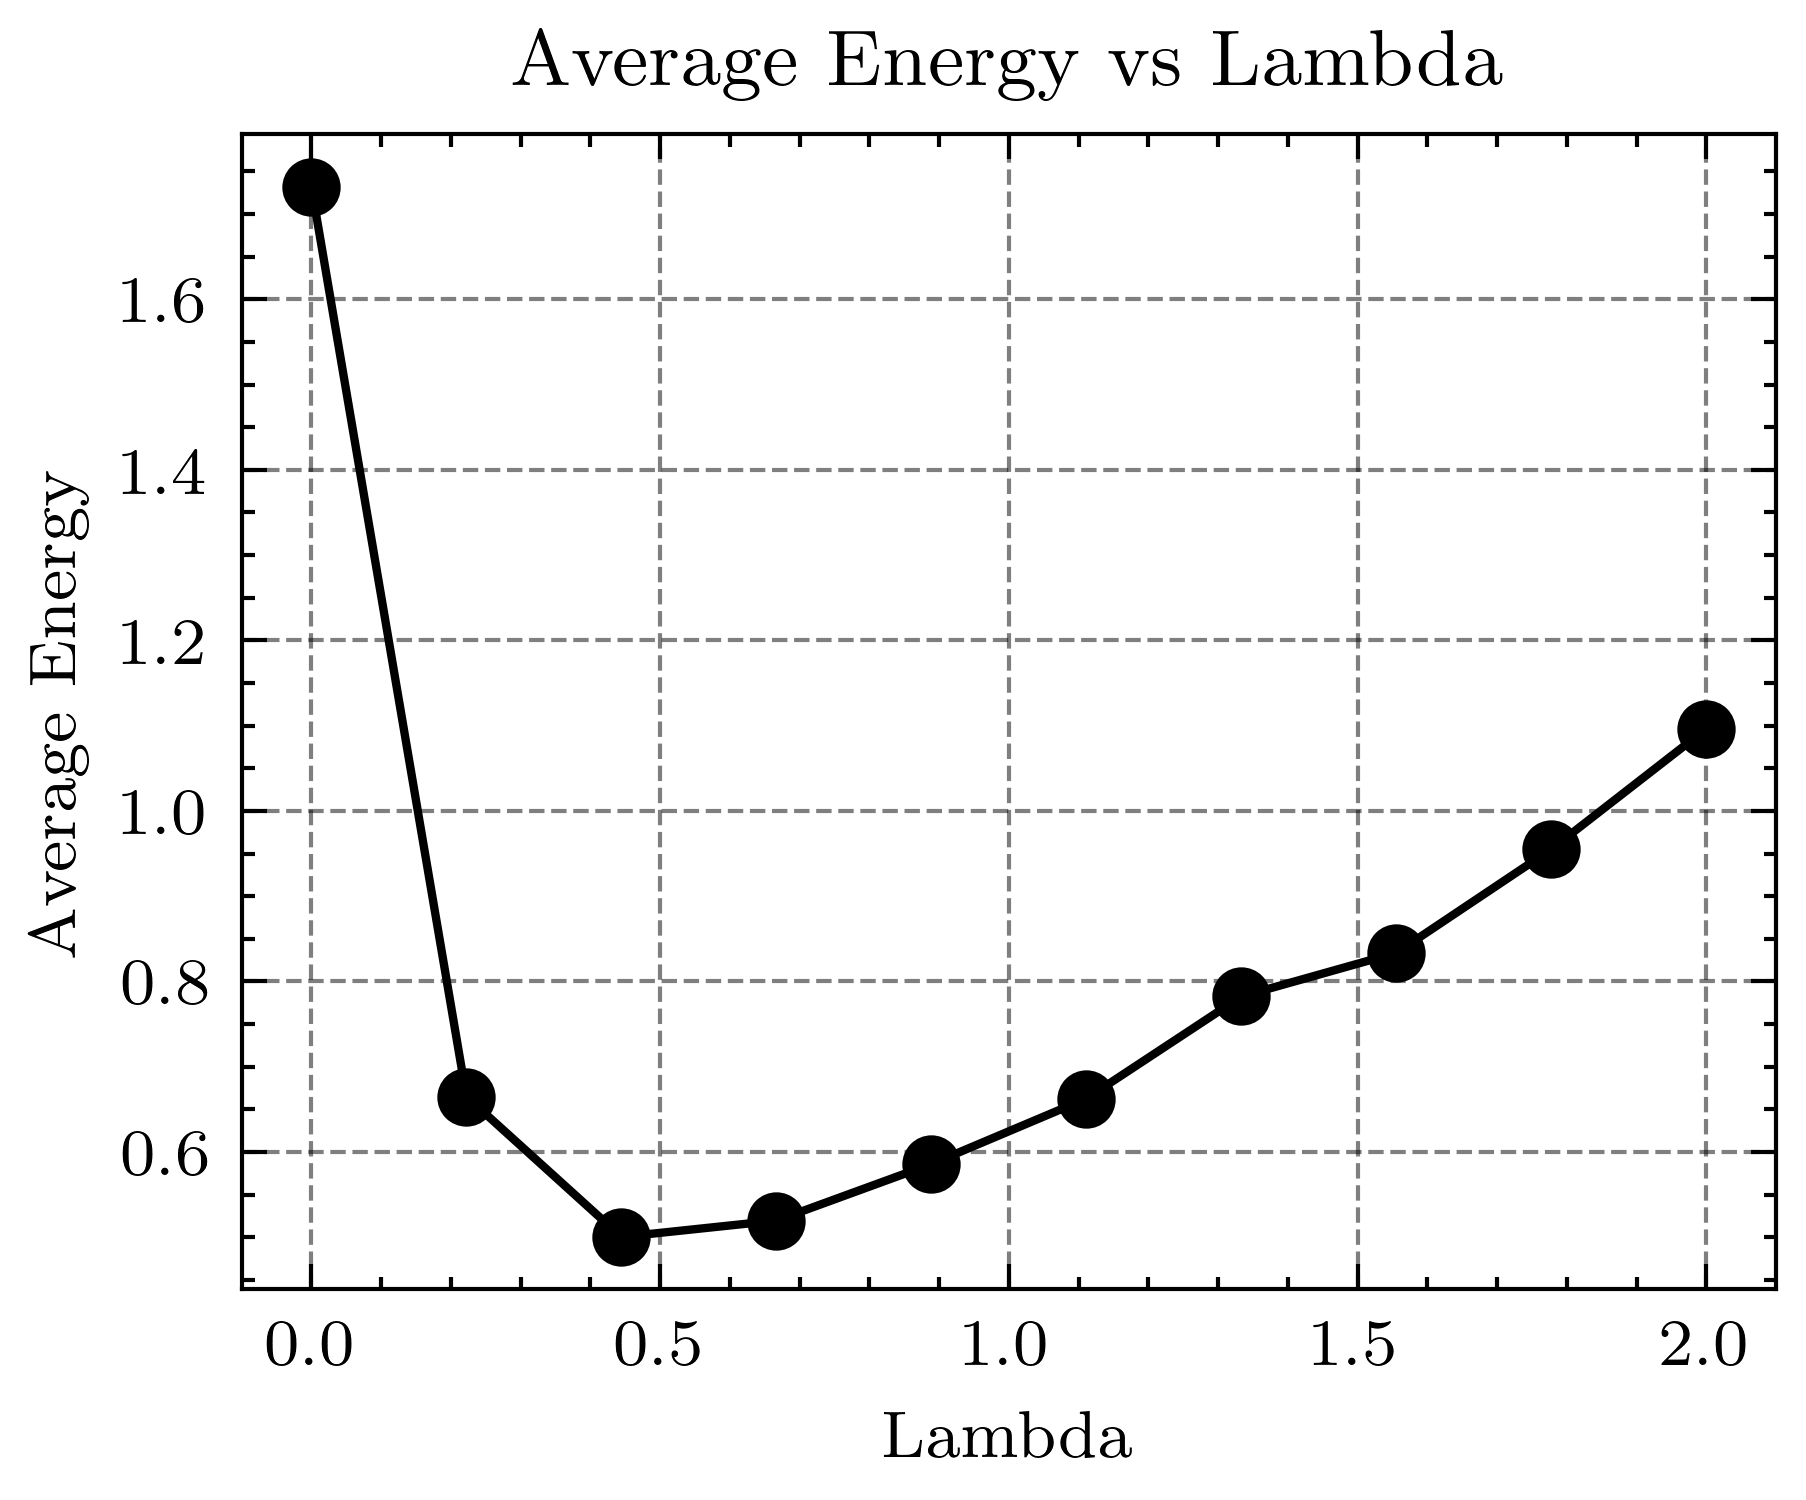

In [11]:
plt.plot(alphas, average_energies, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Average Energy')
plt.title('Average Energy vs Lambda')
plt.grid(True)
plt.show()